In [39]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn import svm
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

In [2]:
def load_csv(file_path):
    try:
        # Use pandas to read the CSV data
        data = pd.read_csv(file_path)
        # Return the data
        return data
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error parsing the CSV file: {file_path}")
        return None
    
    # Load the CSV files
train_data = load_csv('train.csv')
test_data = load_csv('test.csv')

In [3]:
# Explore the data
def display_data(data, num_rows=5):
    # Title: Display First Few Rows
    print("First Few Rows:")
    print(data.head(num_rows))
    
    # Title: Display Data Types
    print("\nData Types:")
    print(data.dtypes)
    
    # Title: Display Data Shape
    print("\nData Shape:")
    print(data.shape)
    
    # Title: Display Missing Values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Title: Display Summary Statistics
    print("\nSummary Statistics:")
    print(data.describe())

    # Title: Display info
    print("\nInfo:")
    print(data.info())

    #Title: Display columns
    print("\nColumns:")
    print(data.columns)

    # Title: Display duplicate rows
    print("\nDuplicate Rows:")
    print(data.duplicated().sum())

# Title: Display Training Data
print("Training Data:")
train_data.head()

Training Data:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
# Title: Display Test Data
print("\nTest Data:")
test_data.head()


Test Data:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [5]:
# Title: Display Shape of Training Data
print("Shape of Training Data:")
print(train_data.shape)

# Title: Display Shape of Test Data
print("Shape of Test Data:")
print(test_data.shape)

Shape of Training Data:
(58592, 44)
Shape of Test Data:
(39063, 43)


In [6]:
# Display missing values in the training data
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Display missing values in the test data
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

Missing Values in Training Data:
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius   

In [7]:
# Summary Statistics for the training data
print("Summary Statistics for Training Data:")
print(train_data.describe())

# Summary Statistics for the test data
print("\nSummary Statistics for Test Data:")
print(test_data.describe())

Summary Statistics for Training Data:
       policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.

In [8]:
# Display info for the training data
print("Info for Training Data:")
print(train_data.info())

# Display info for the test data
print("\nInfo for Test Data:")
print(test_data.info())

Info for Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non

In [9]:
# Display columns for the training data
print("Columns for Training Data:")
print(train_data.columns)

# Display columns for the test data
print("\nColumns for Test Data:")
print(test_data.columns)

Columns for Training Data:
Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

Columns for Test Data:
Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'ar

In [10]:
# Display class distribution for the target variable
print("Class Distribution for the Target Variable of training set:")
print(train_data['is_claim'].value_counts())

Class Distribution for the Target Variable of training set:
is_claim
0    54844
1     3748
Name: count, dtype: int64


In [11]:
# Display the values of the target variable
print("\nValues of the Target Variable:")
print(train_data['is_claim'].unique())

# Calculate the imbalance ratio
imbalance_ratio = train_data['is_claim'].value_counts()[0] / train_data['is_claim'].value_counts()[1]
print(f"\nImbalance Ratio: class(0) has 14 times more instances than class(1): {imbalance_ratio}")


Values of the Target Variable:
[0 1]

Imbalance Ratio: class(0) has 14 times more instances than class(1): 14.632870864461045


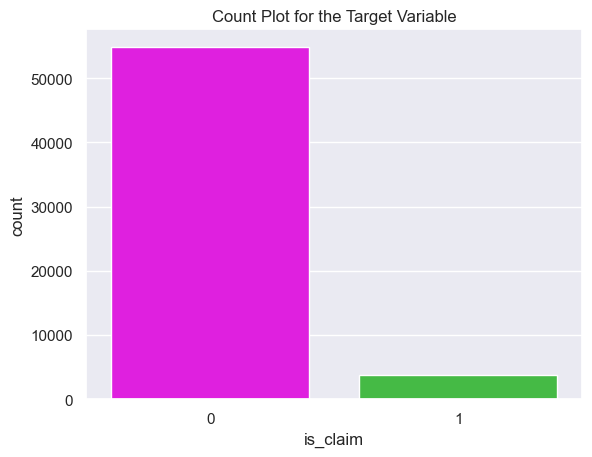

In [12]:
# create a function that crates a count plot for the target variable of the training data and have it be darkgrid with magenta and lime green colors
def count_plot(data, x, hue, palette, title):
    sns.set(style="darkgrid")
    sns.countplot(data=data, x=x, hue=x, palette=palette, legend=False)
    plt.title(title)
    plt.show()

# Title: Count Plot for the Target Variable
count_plot(train_data, 'is_claim', None, ['magenta', 'limegreen'], 'Count Plot for the Target Variable')

                     policy_tenure  age_of_car  age_of_policyholder  \
policy_tenure             1.000000    0.166312             0.143676   
age_of_car                0.166312    1.000000            -0.035427   
age_of_policyholder       0.143676   -0.035427             1.000000   
population_density       -0.100307   -0.062255             0.009669   
make                      0.086101    0.188122            -0.031989   
airbags                   0.103981    0.209073            -0.008041   
displacement              0.194361    0.393208            -0.023764   
cylinder                  0.191185    0.379522             0.004183   
gear_box                  0.095305    0.201579            -0.003115   
turning_radius            0.166426    0.332716            -0.016764   
length                    0.190869    0.383177            -0.020138   
width                     0.213228    0.414104            -0.006135   
height                    0.119055    0.259156            -0.053930   
gross_

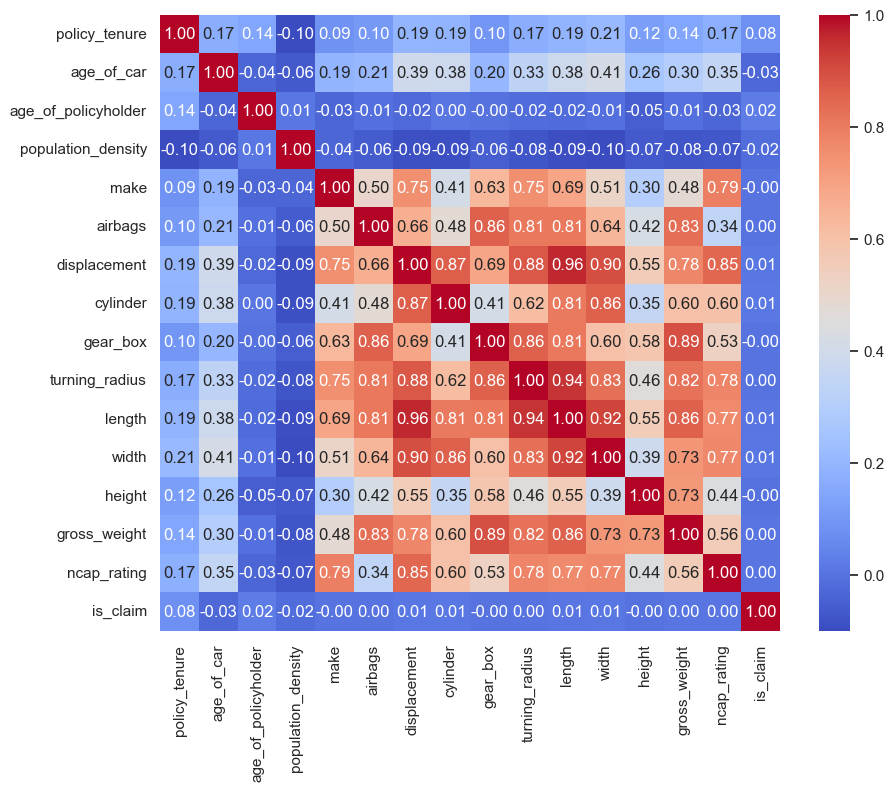

In [13]:
def create_heatmap(train_data):
    # Select only the numeric columns from the DataFrame
    numeric_df = train_data.select_dtypes(include='number')

    # Create a correlation matrix
    corr = numeric_df.corr()

    # Print the correlation matrix
    print(corr)

    # Create a heatmap from the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

    # Show the plot
    plt.show()

# Title: Heatmap for the Training Data
create_heatmap(train_data)

Policy Tenure and Age of Car: There's a weak positive correlation (0.166) between policy tenure and the age of the car. This could indicate that customers tend to keep their insurance policies longer for older cars, possibly due to a perception of higher risk or higher insurance costs for newer vehicles.


Age of Policyholder and Age of Car: Surprisingly, there's a slight negative correlation (-0.035) between the age of the policyholder and the age of the car. One possible explanation could be that younger policyholders might prefer newer cars, which could lead to a shorter duration of car ownership before upgrading.


Population Density: There's a weak negative correlation (-0.100) between population density and policy tenure. This might suggest that policyholders in less densely populated areas tend to hold onto their policies for longer periods, possibly due to fewer insurance options or a lesser need to shop around for better deals.


Vehicle Characteristics: Variables like make, airbags, displacement, cylinder, gear box, turning radius, length, width, height, gross weight, and NCAP rating show varying degrees of correlation with each other. These correlations might indicate multicollinearity, which could affect predictive modeling. It's essential to consider these correlations when building predictive models to avoid overfitting or underfitting.


Claim Probability: The correlation between predictor variables and the target variable "is_claim" is generally weak, with most correlations below 0.1. This suggests that individual predictor variables might not strongly predict the likelihood of a claim. However, collectively, these variables might contribute to predicting claim probability when considered together in a predictive model.

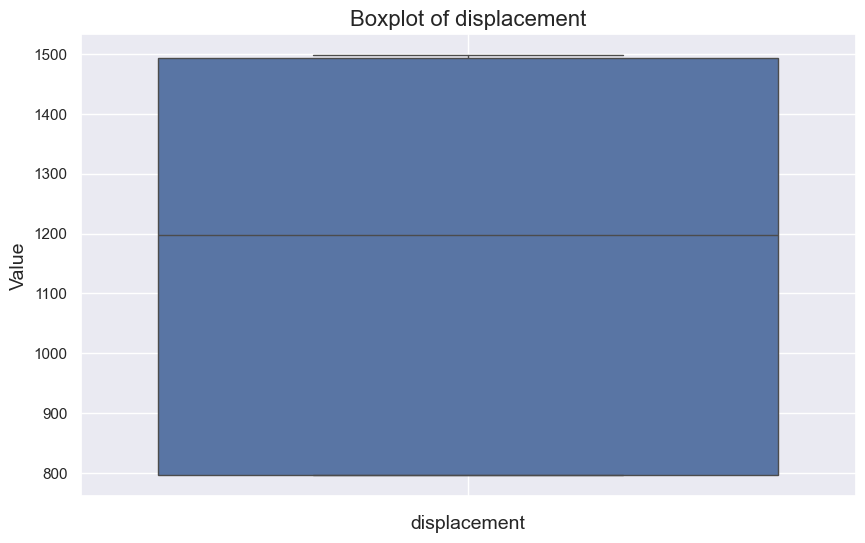

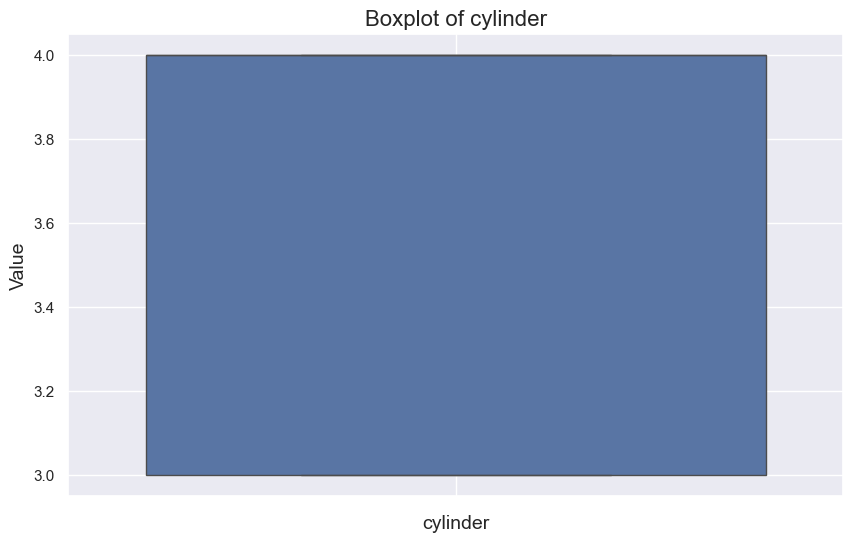

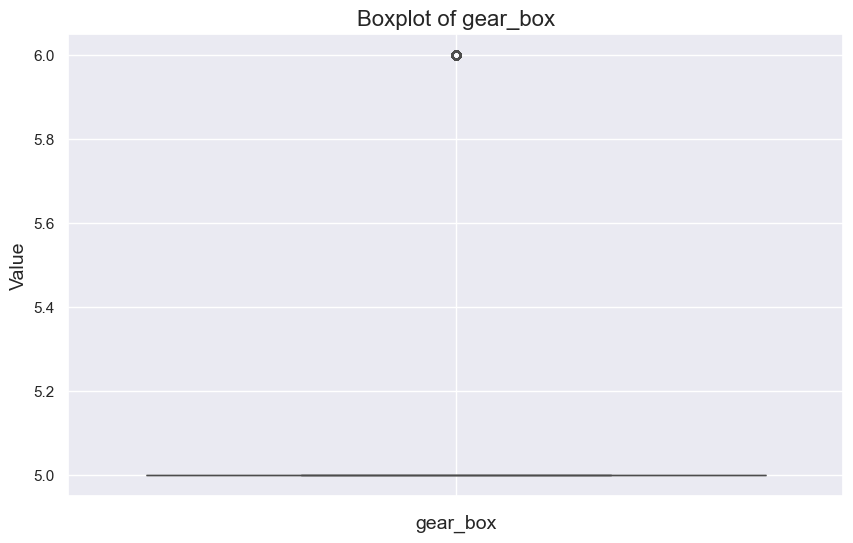

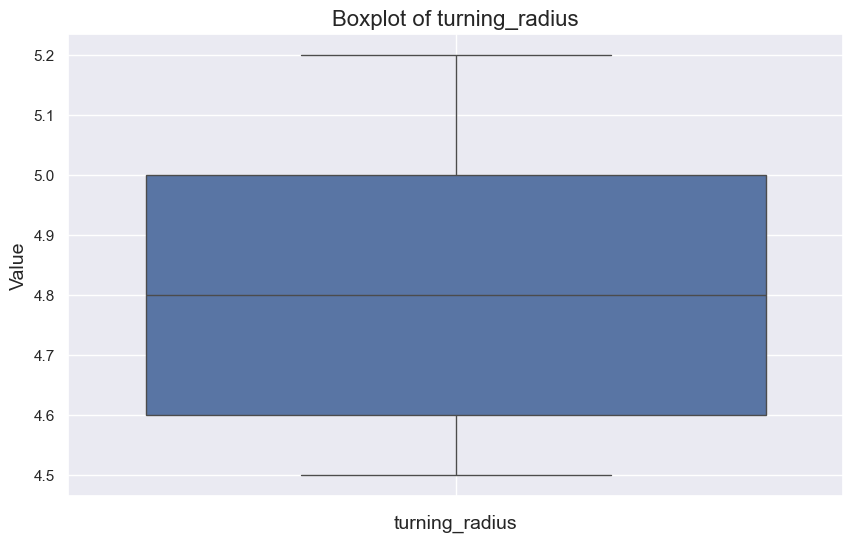

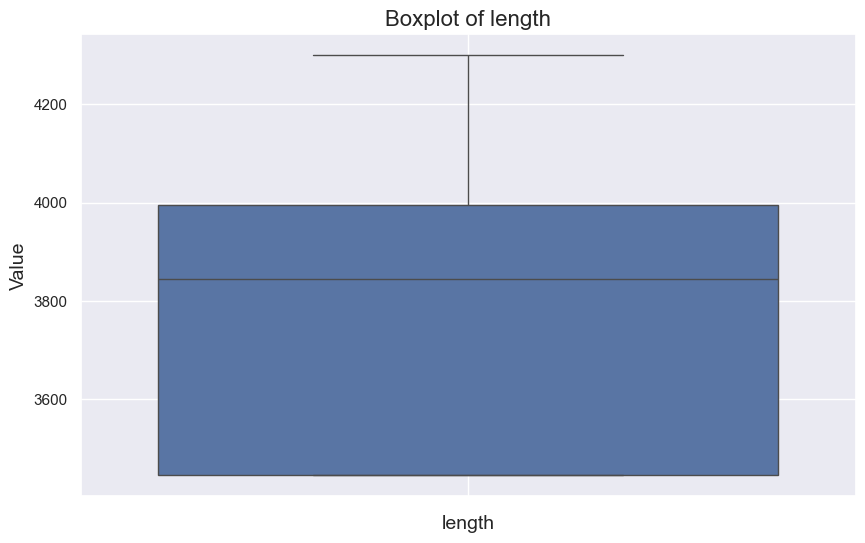

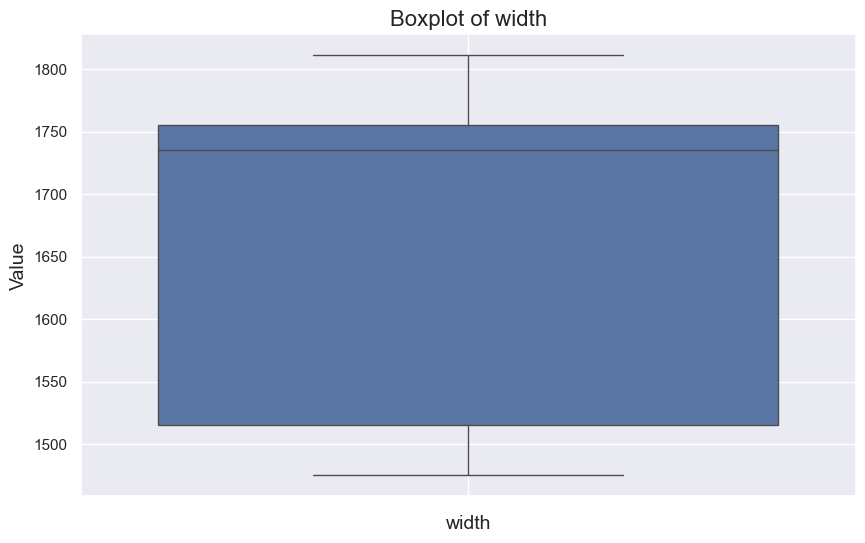

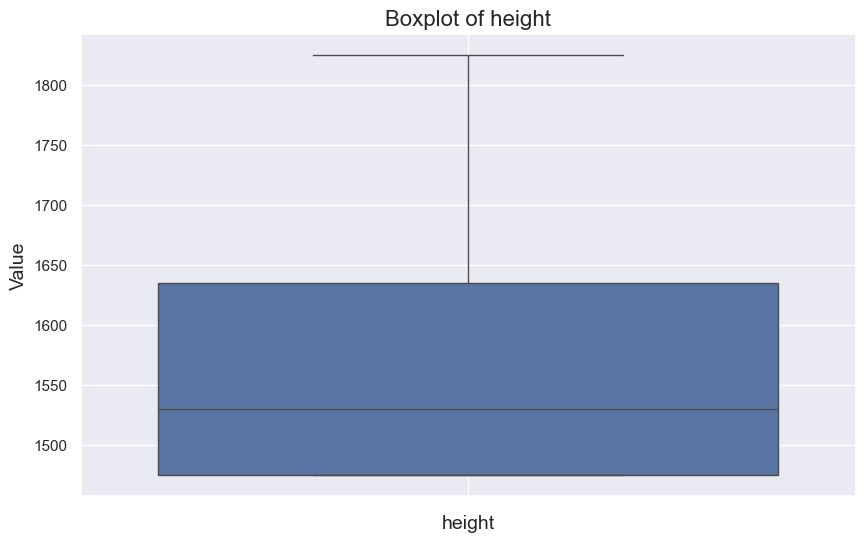

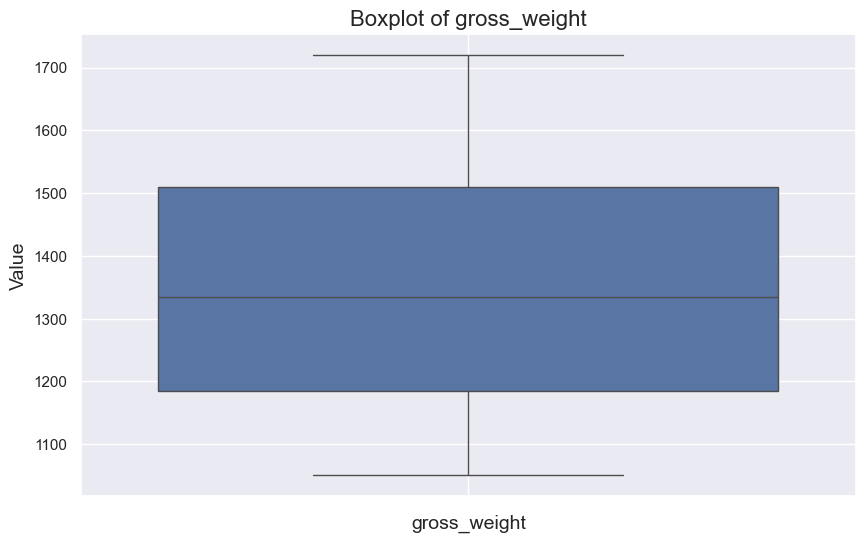

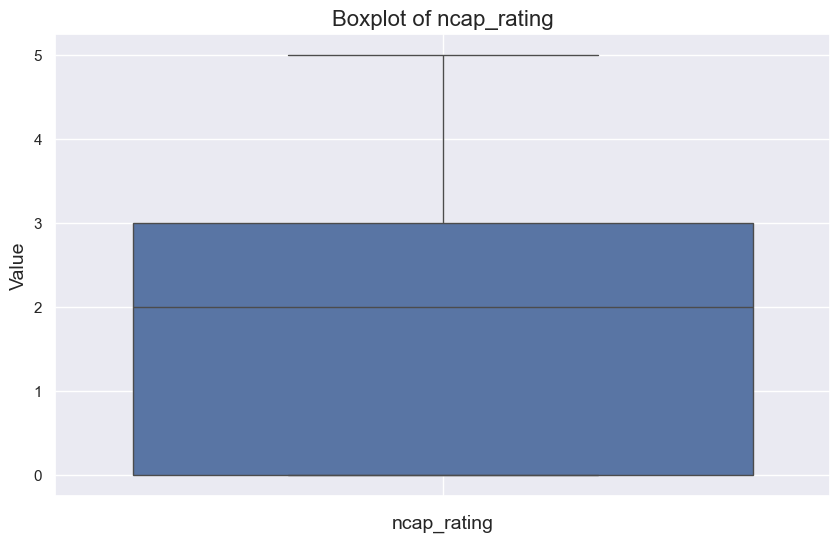

In [14]:
def create_boxplots(data, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, y=column)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Value', fontsize=14)
        plt.title(f'Boxplot of {column}', fontsize=16)
        plt.grid(True)
        plt.show()

# Title: Boxplots for the Training Data
create_boxplots(train_data, ['displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height','gross_weight','ncap_rating'])

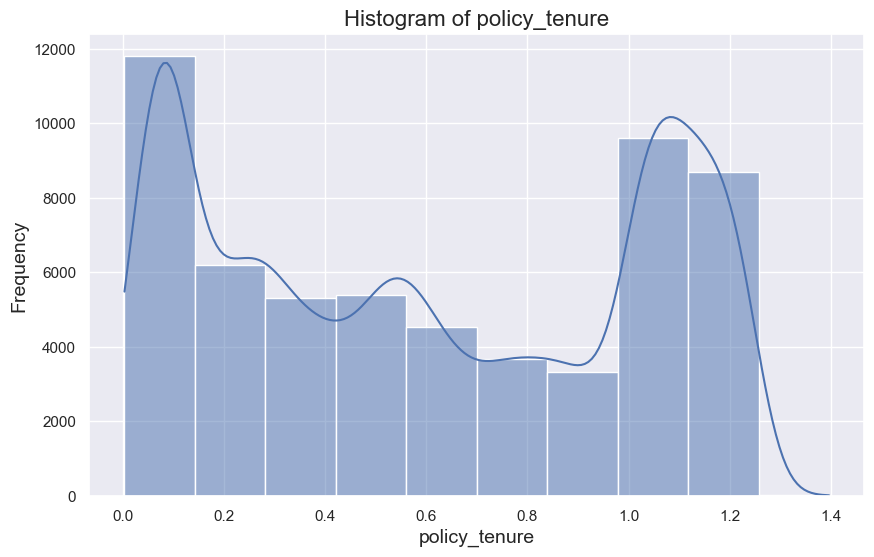

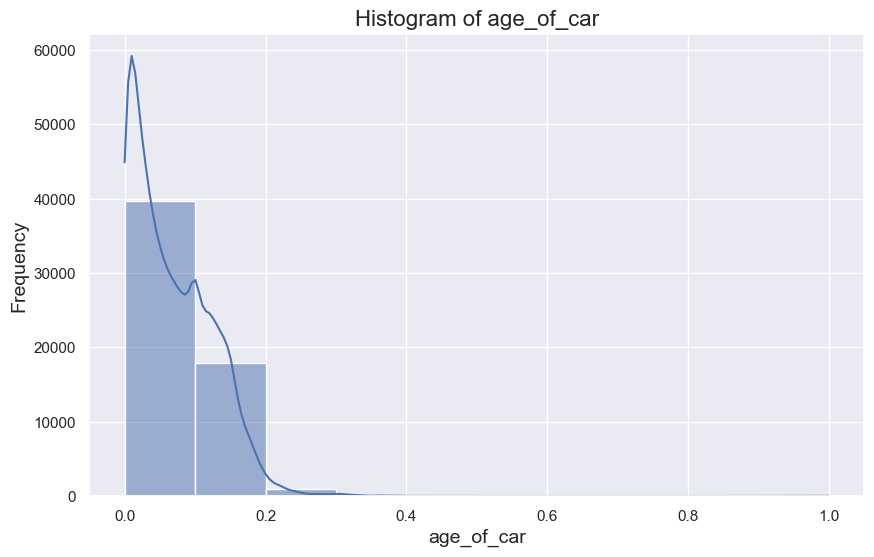

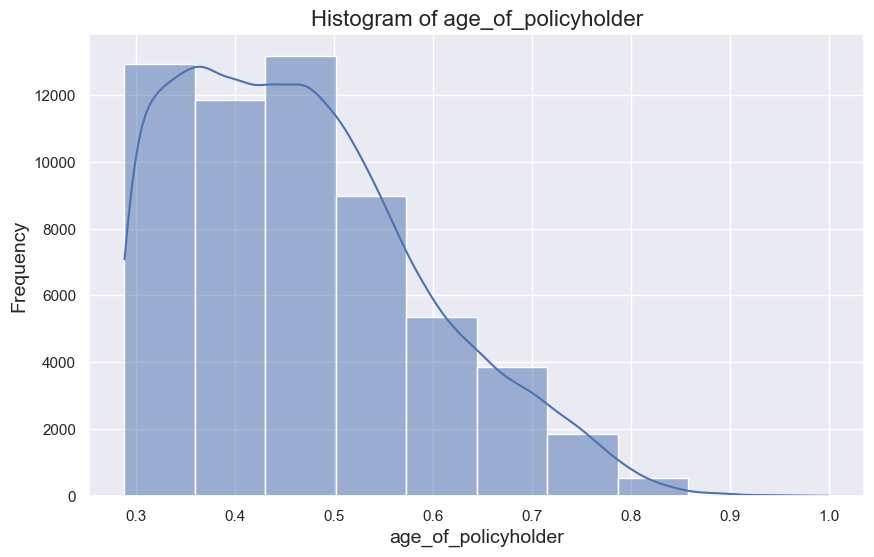

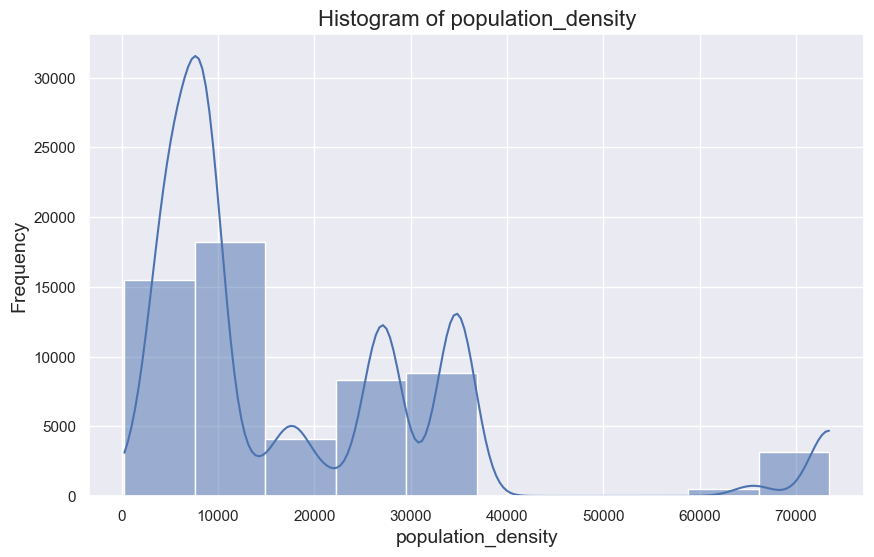

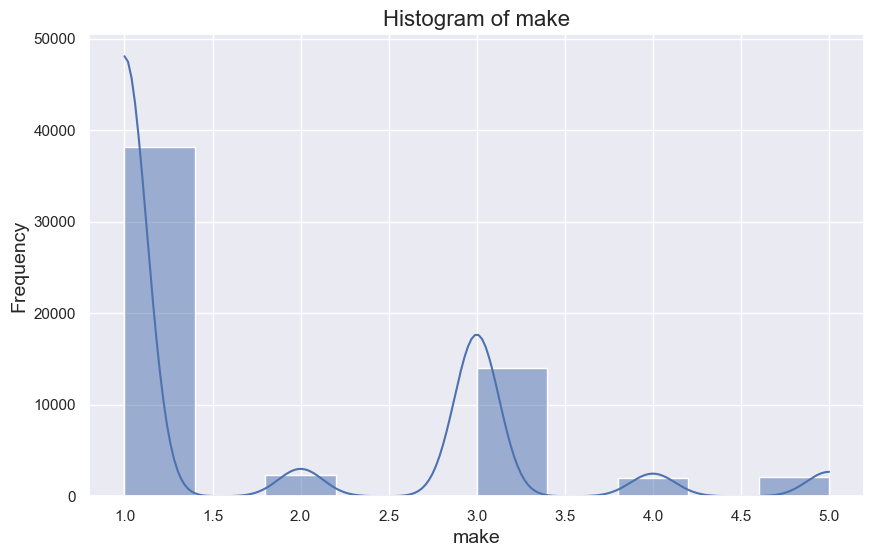

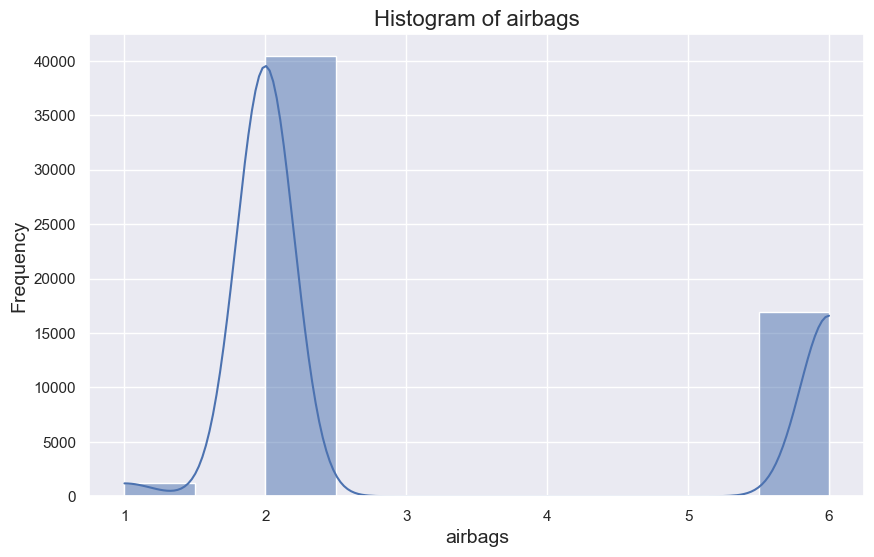

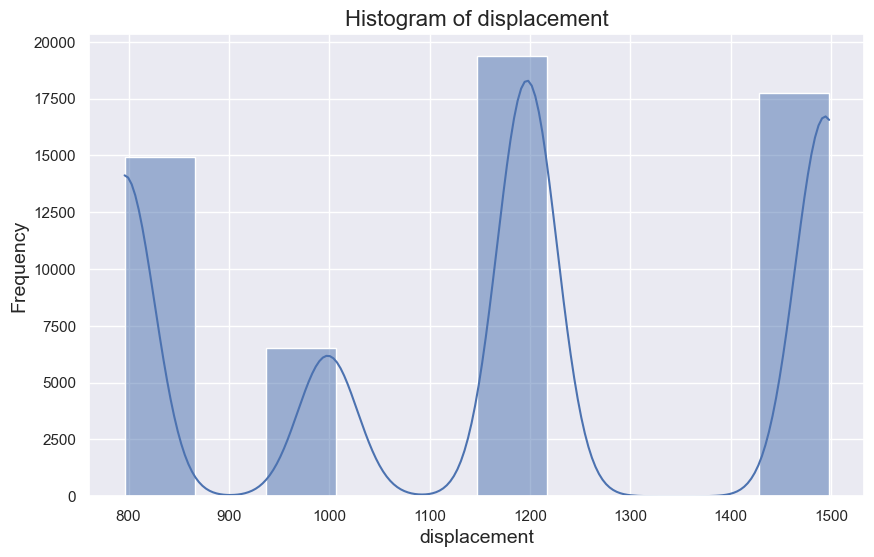

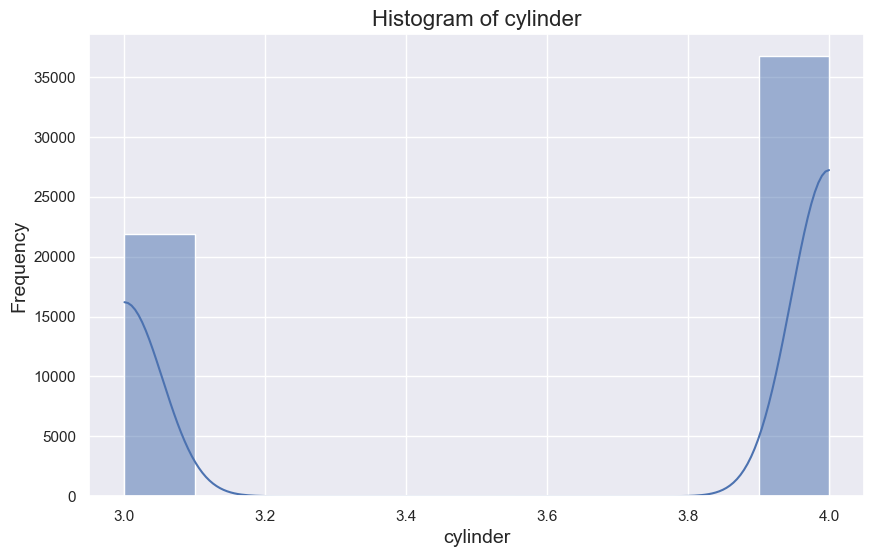

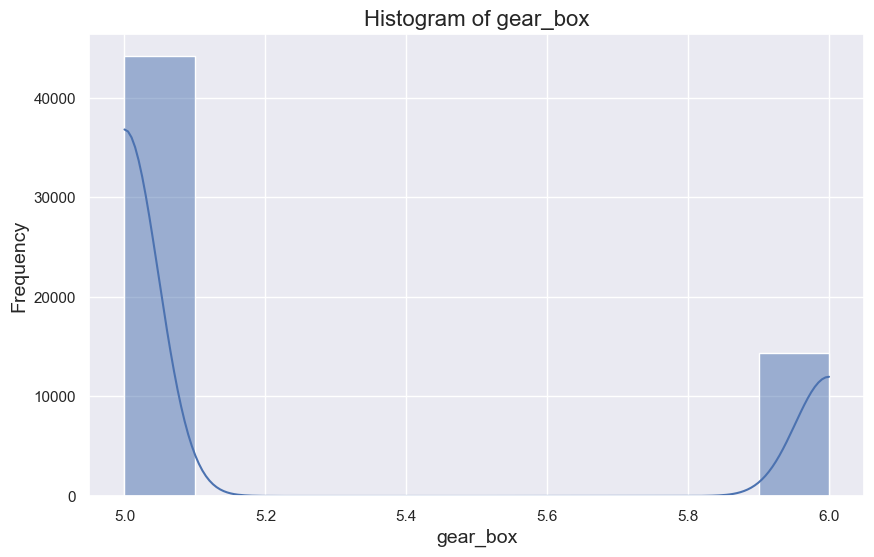

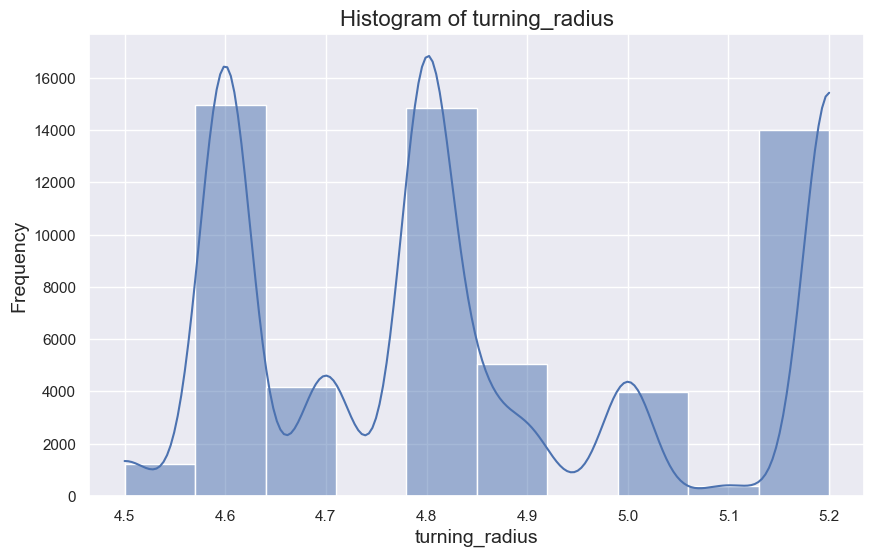

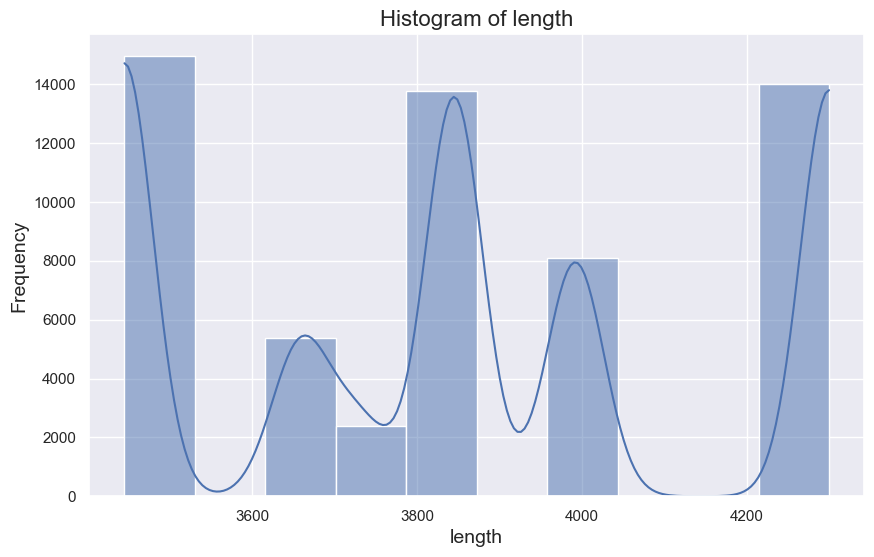

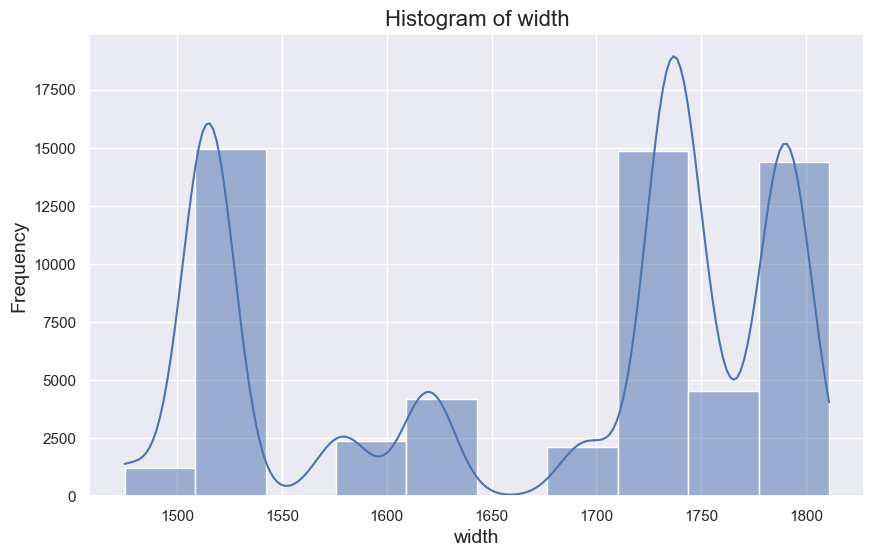

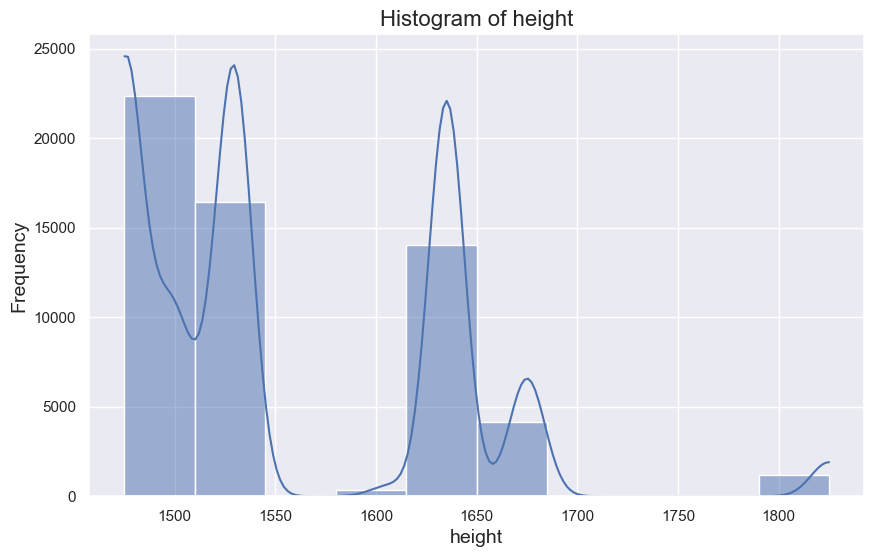

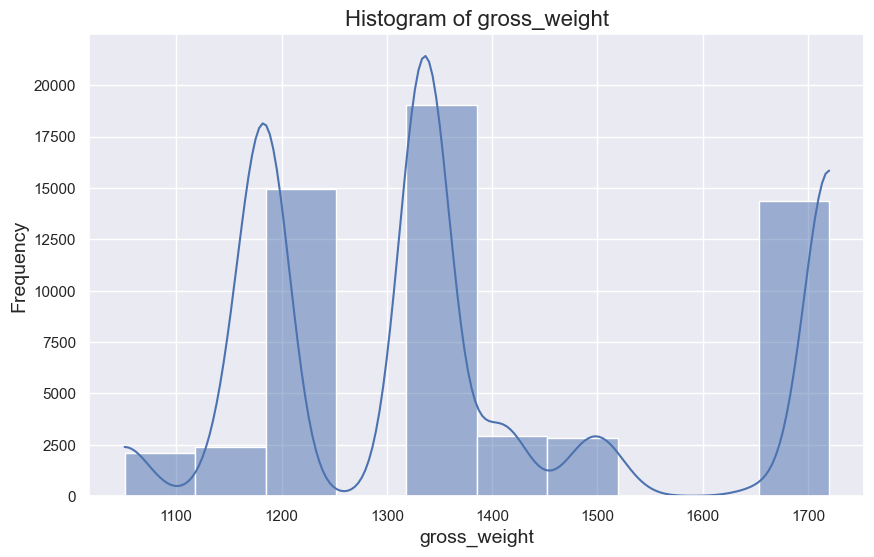

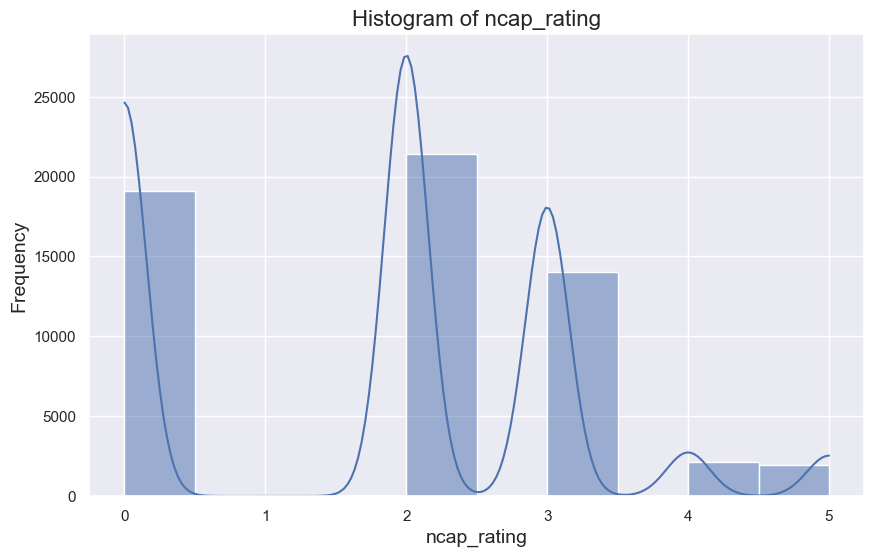

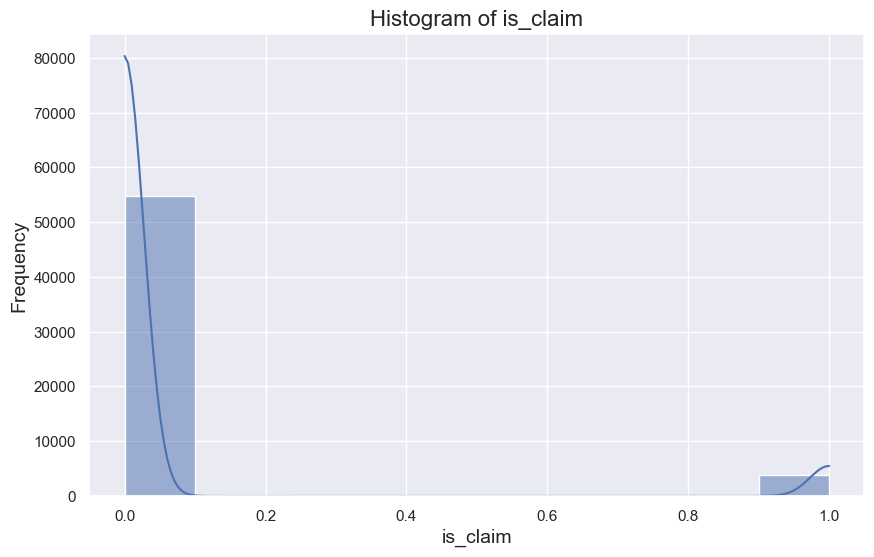

In [15]:
def create_histograms(data):
    # Select only the numeric columns from the DataFrame
    numeric_df = data.select_dtypes(include='number')

    # Create histograms for each numeric column
    for column in numeric_df.columns:
        plt.figure(figsize=(10, 6))  # Adjust the size of the plot
        sns.histplot(data[column], bins=10, kde=True)  # Use seaborn's histplot function
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.title(f'Histogram of {column}', fontsize=16)
        plt.grid(True)  # Add gridlines
        plt.show()

# Call the function with the training data
create_histograms(train_data)

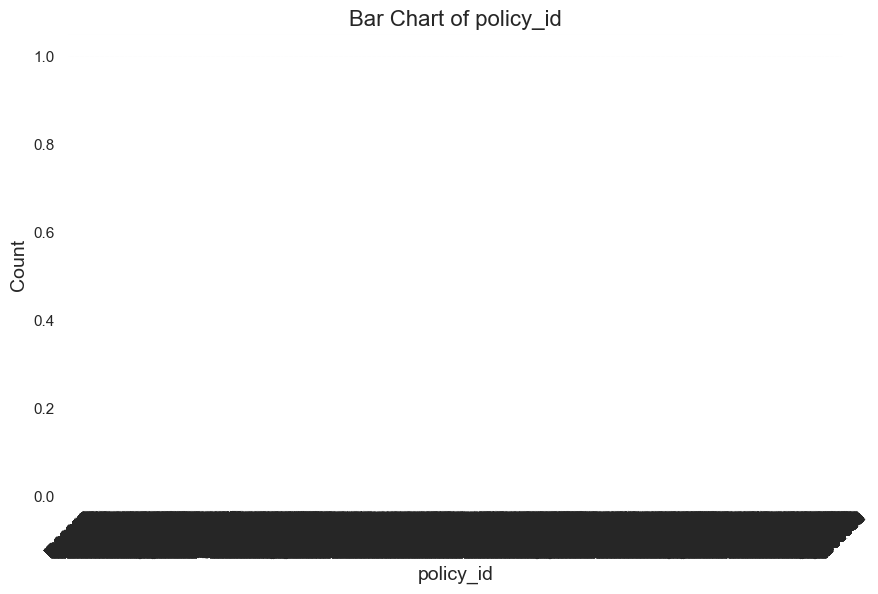

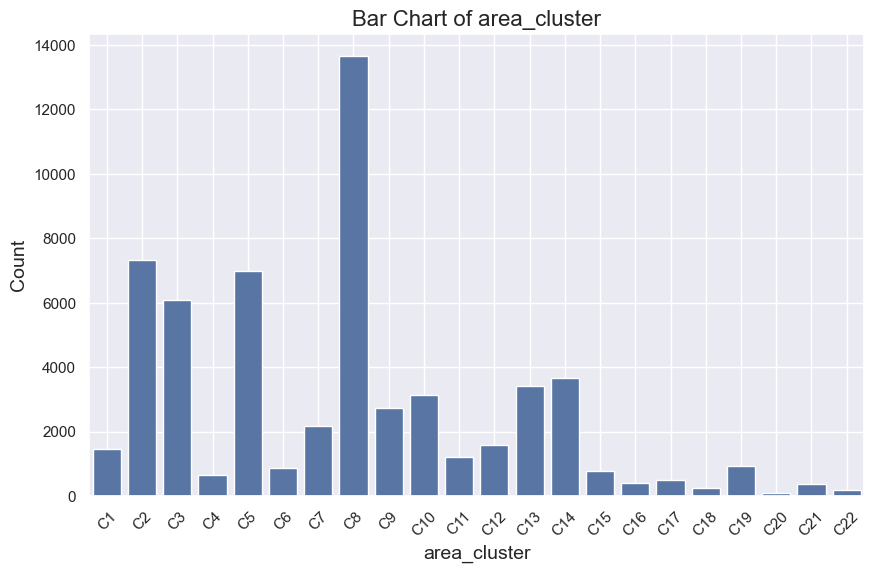

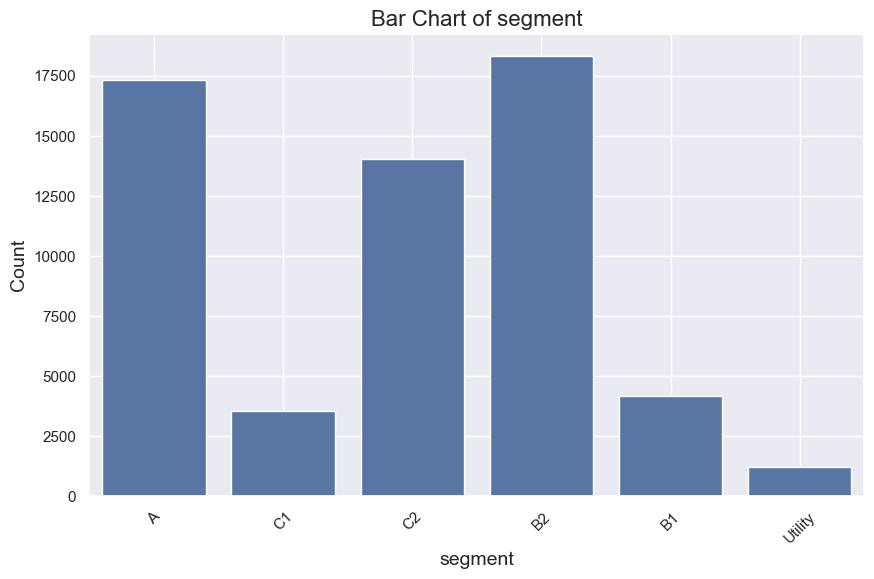

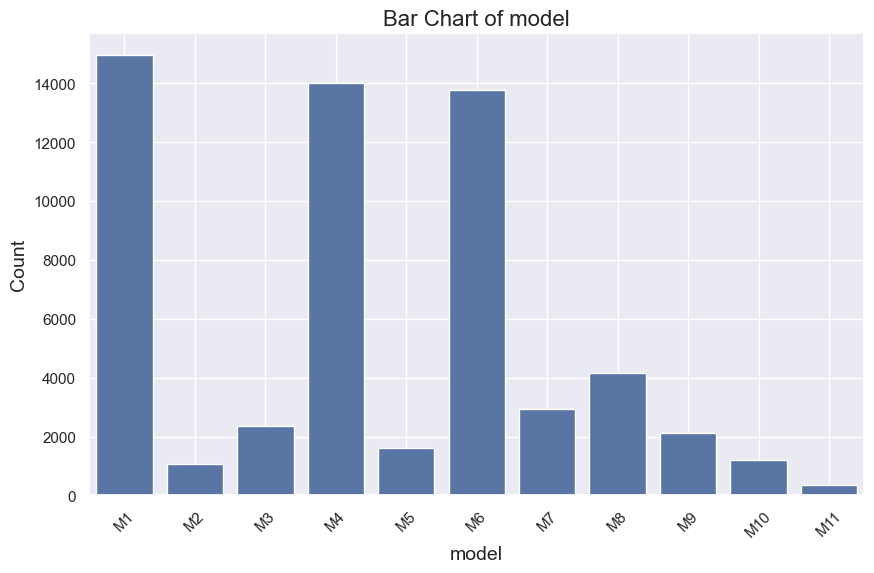

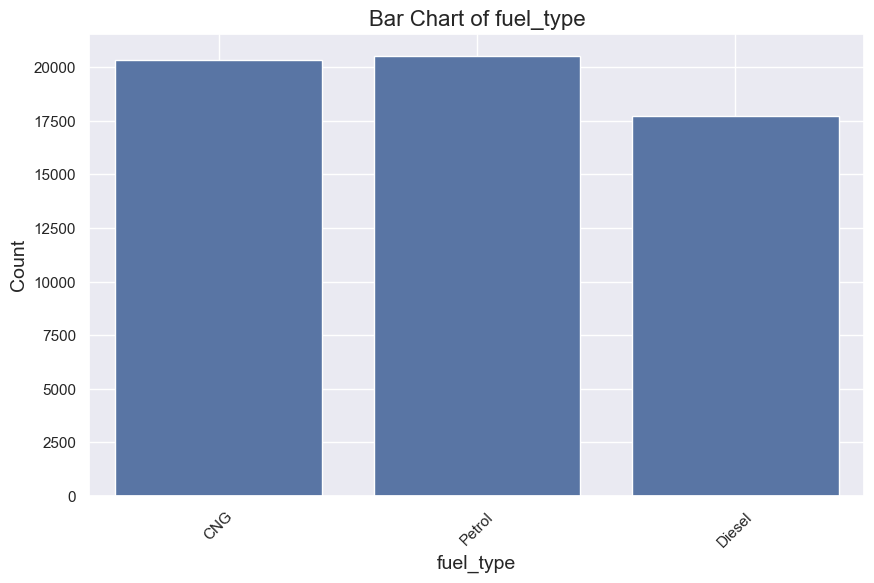

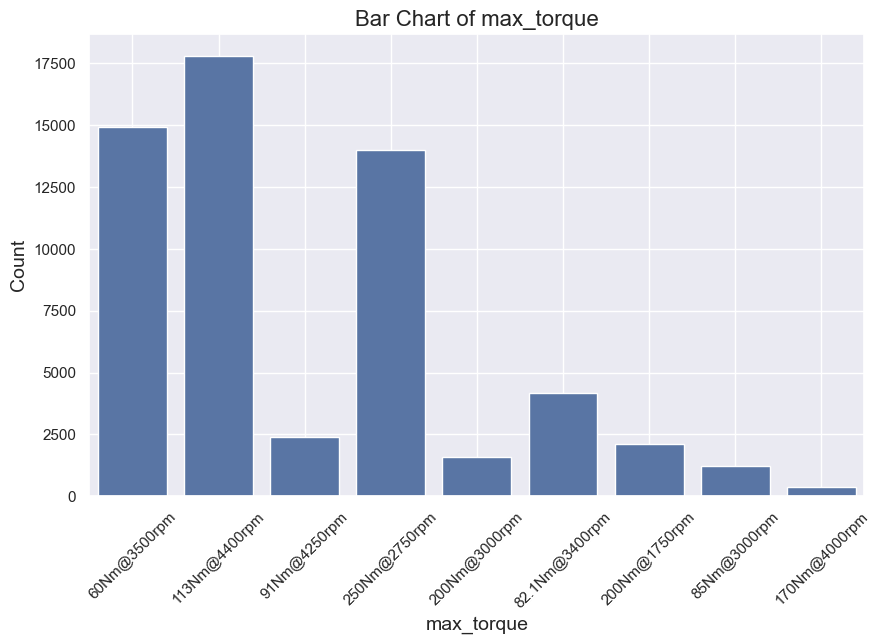

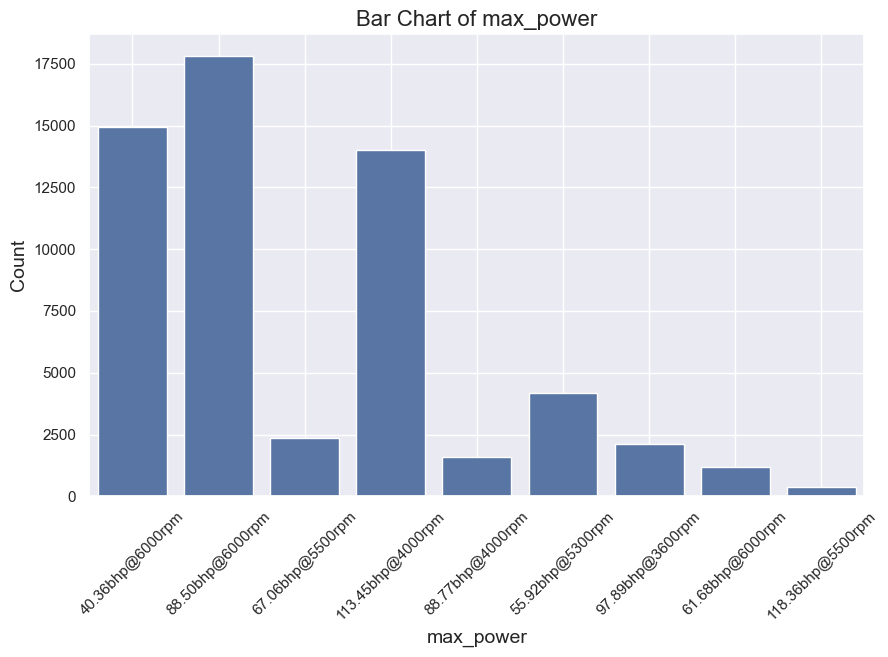

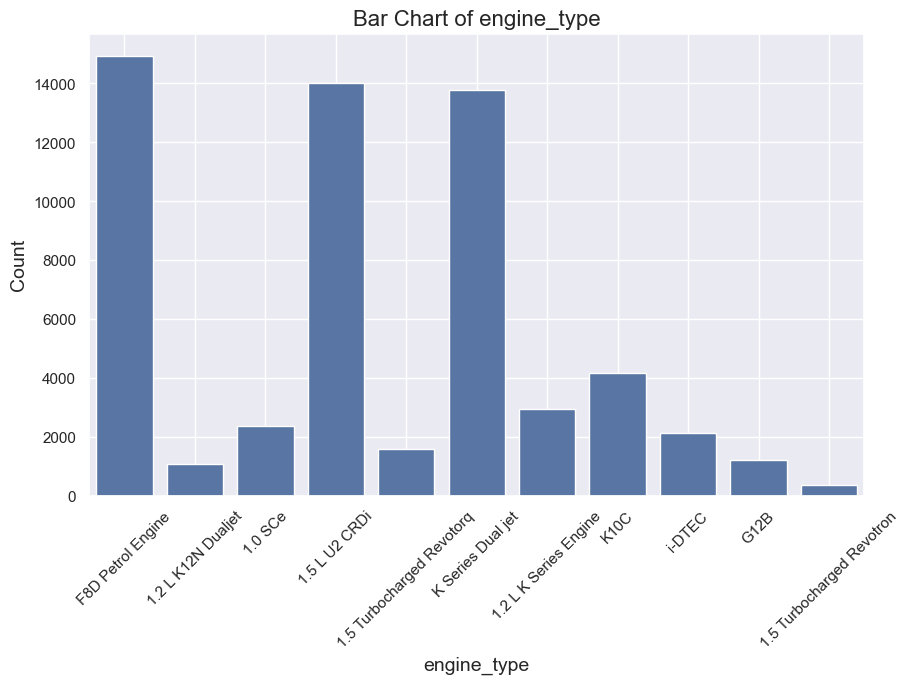

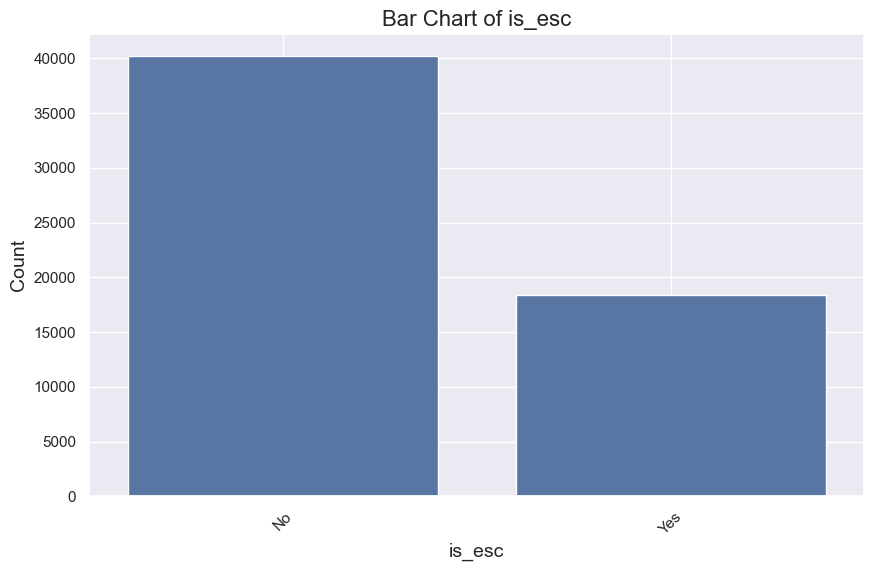

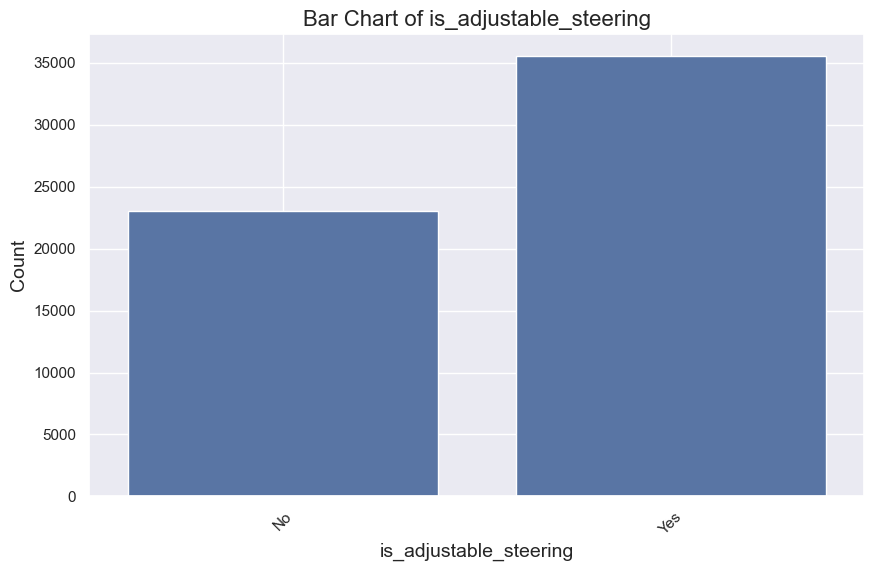

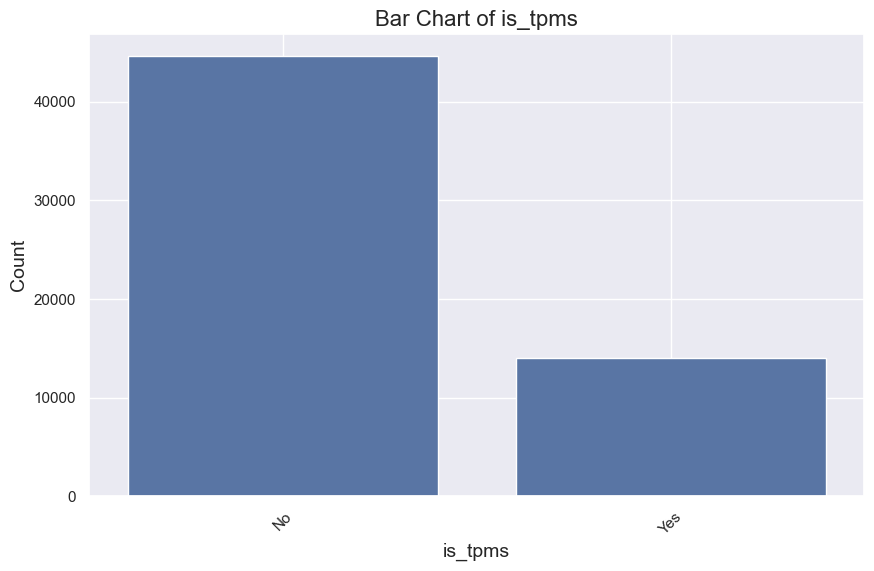

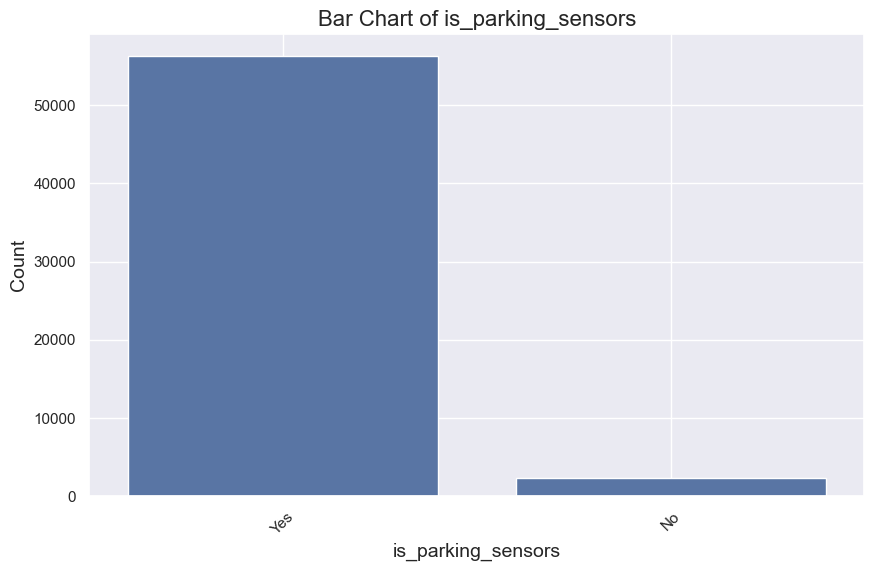

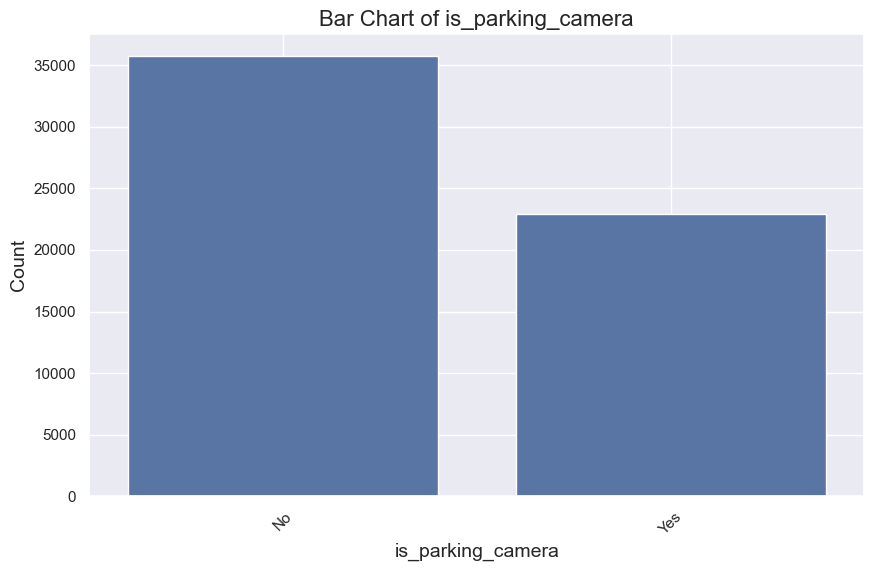

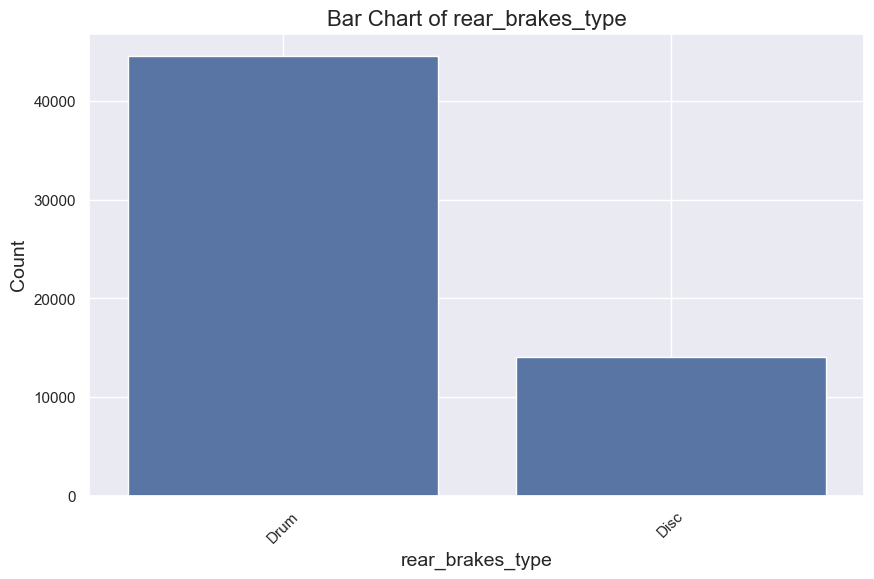

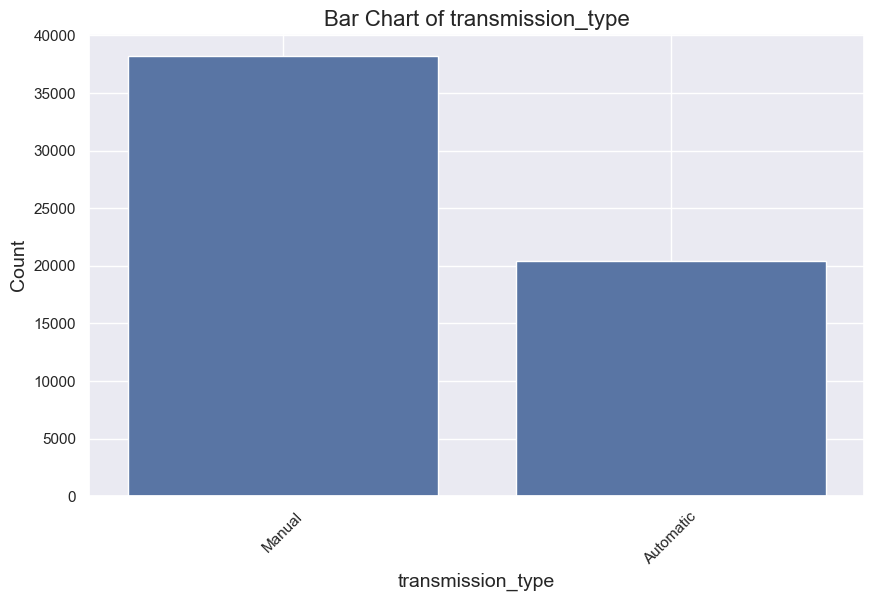

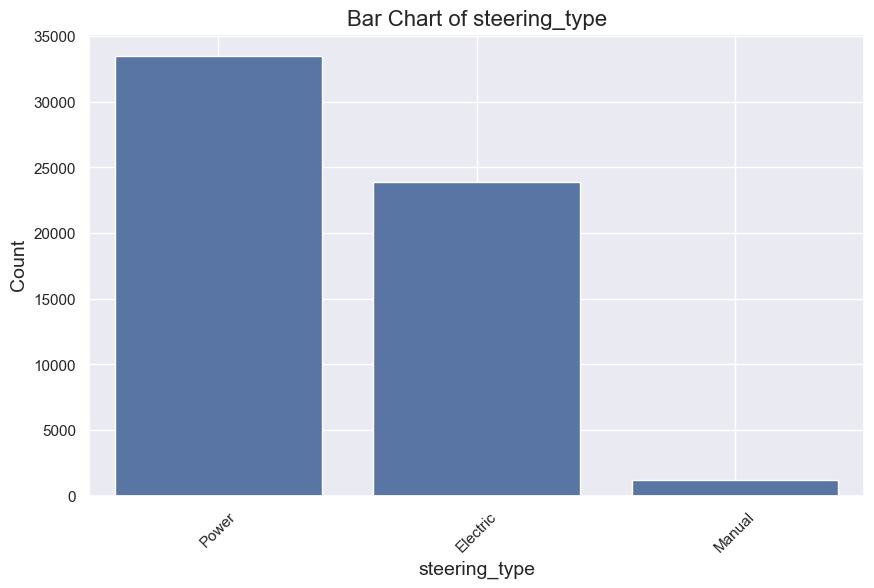

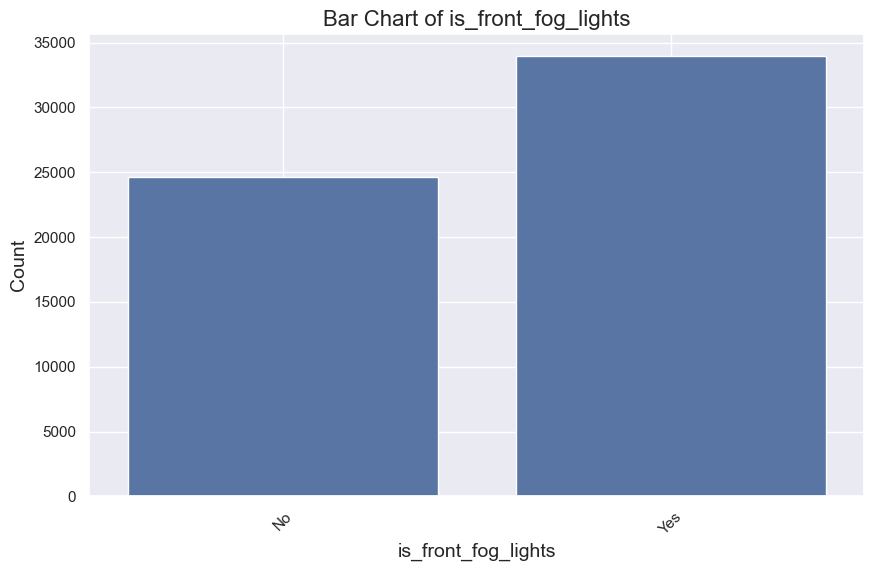

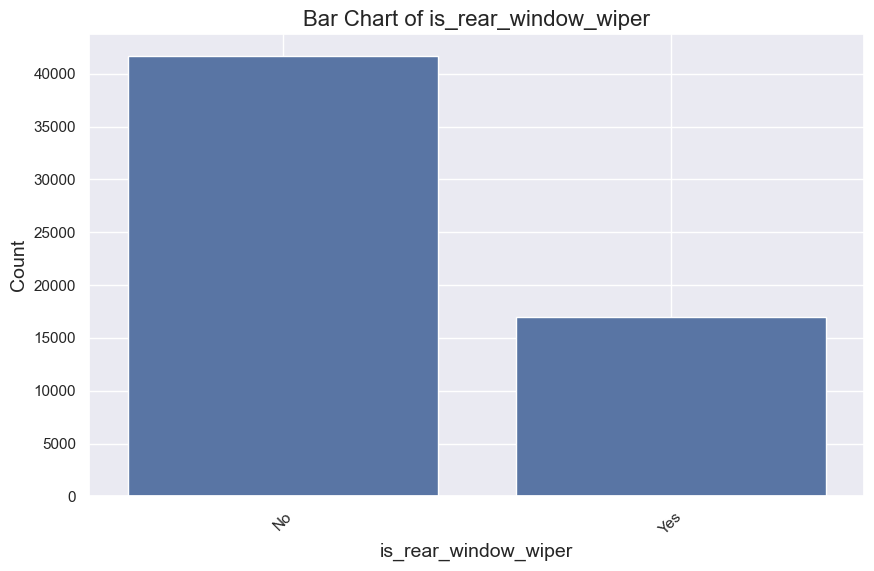

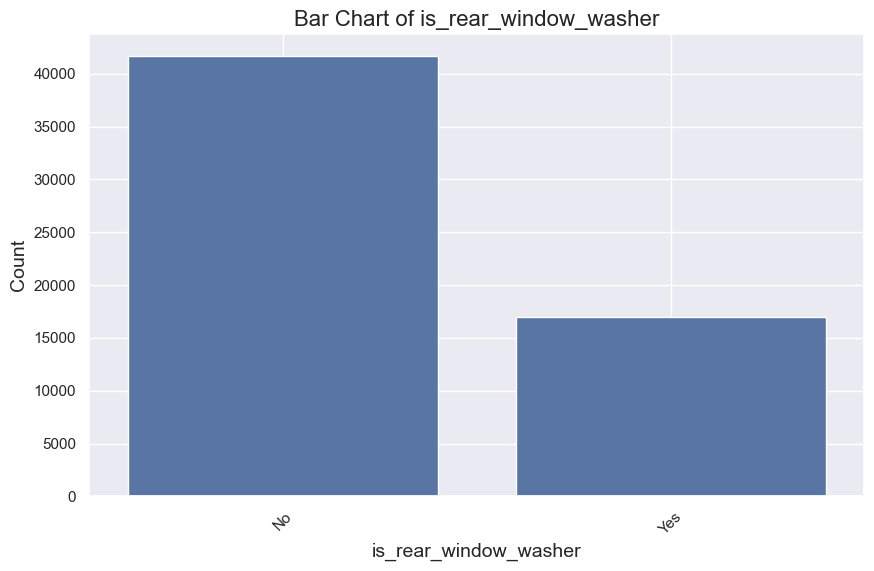

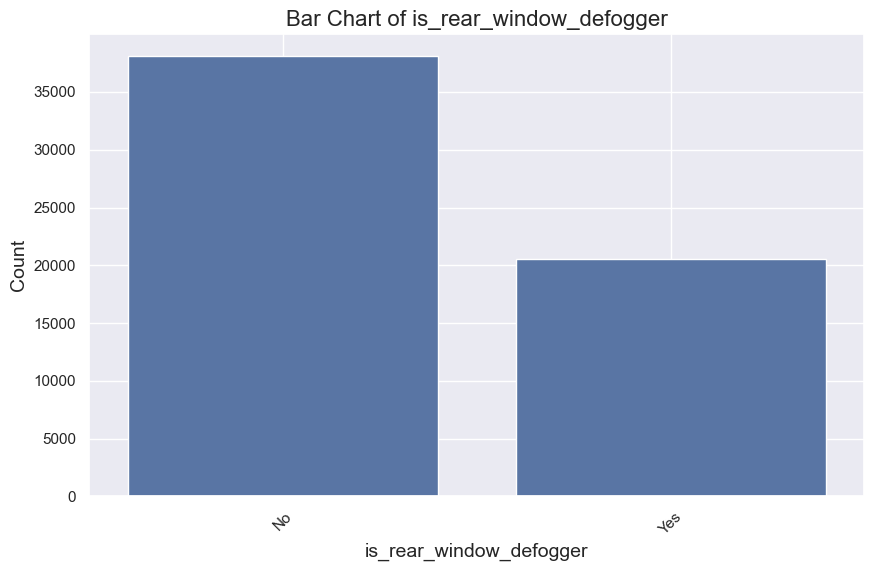

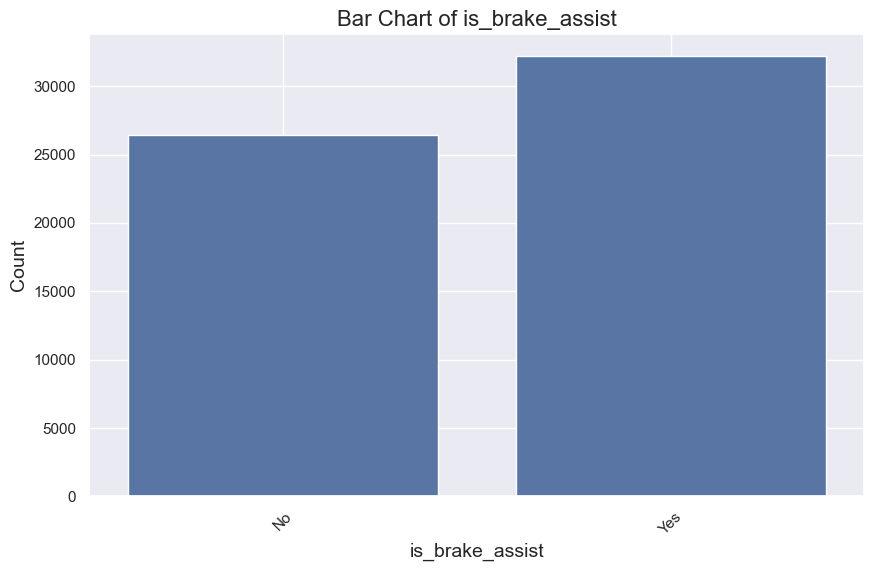

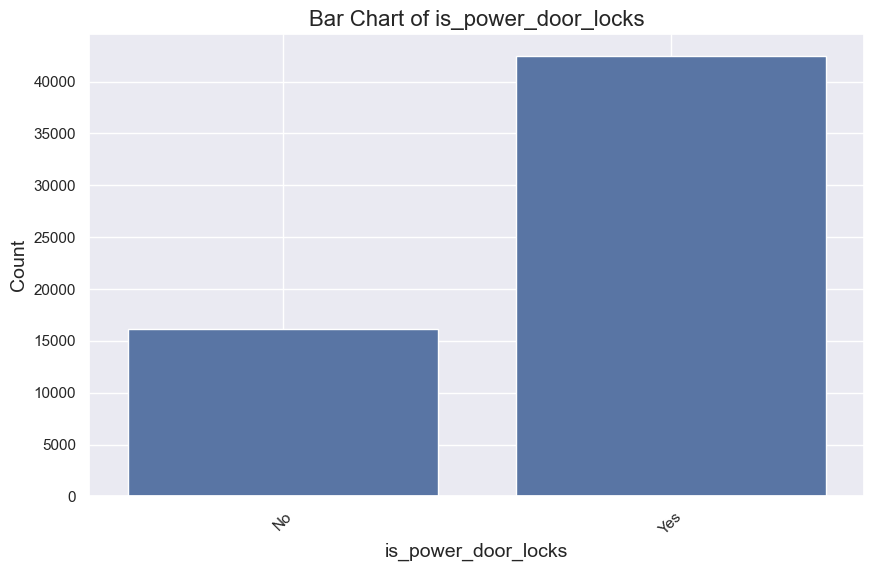

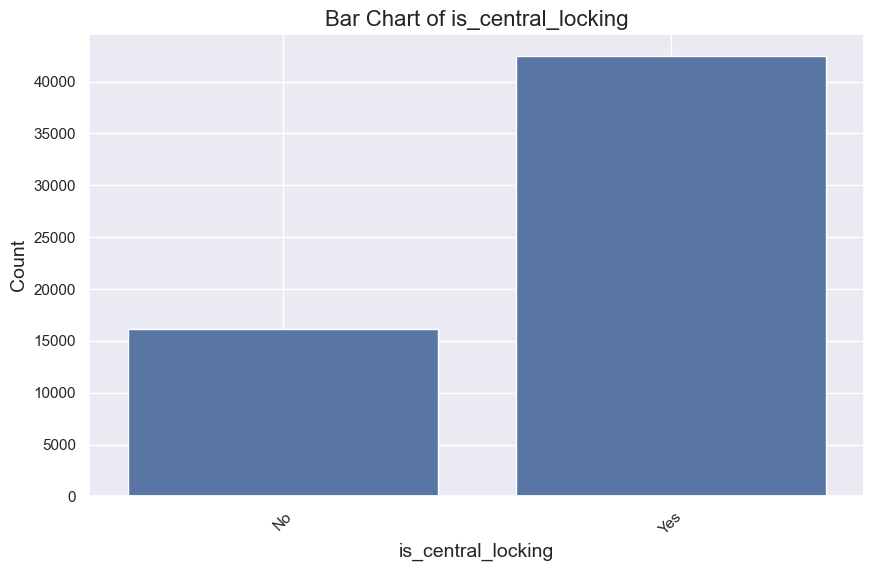

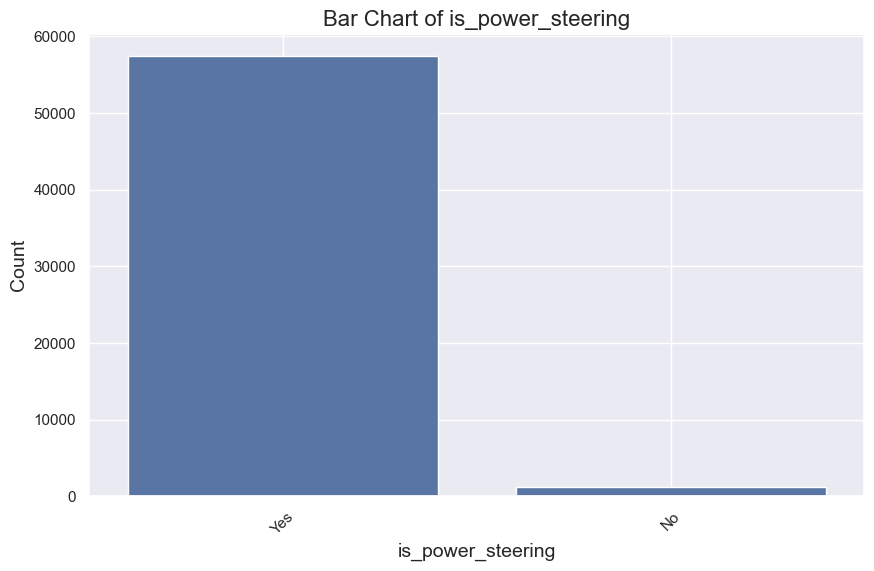

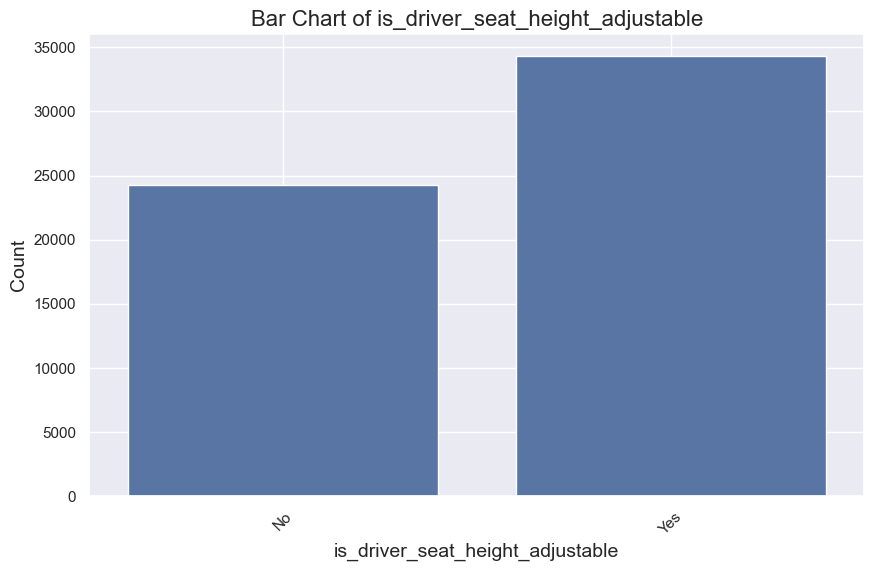

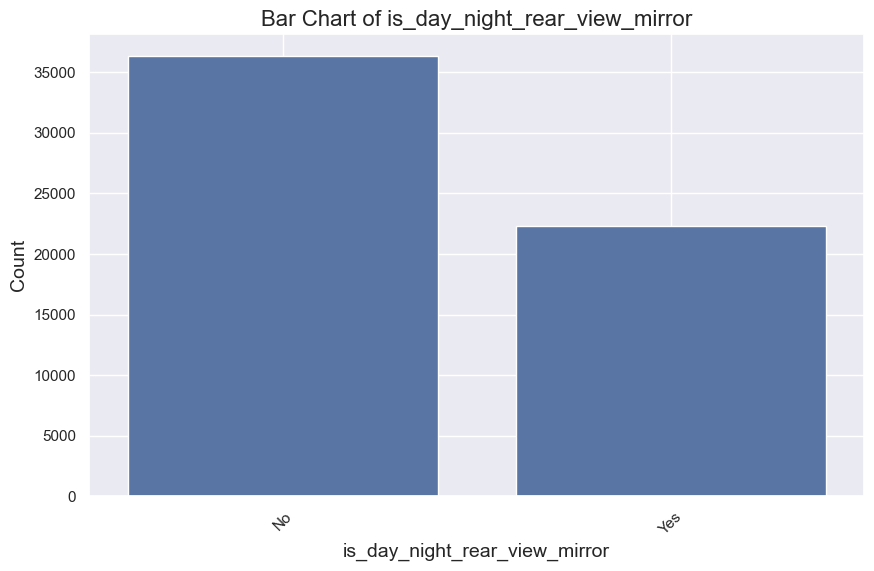

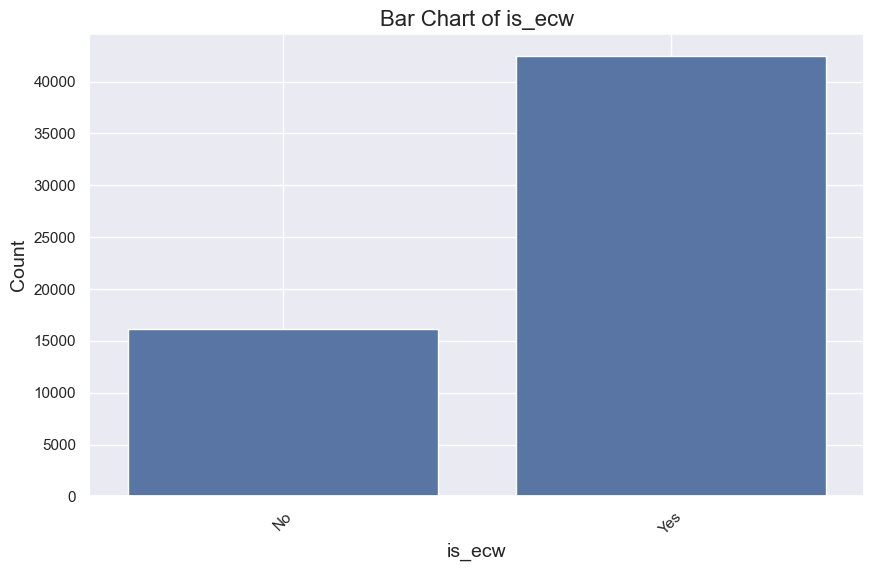

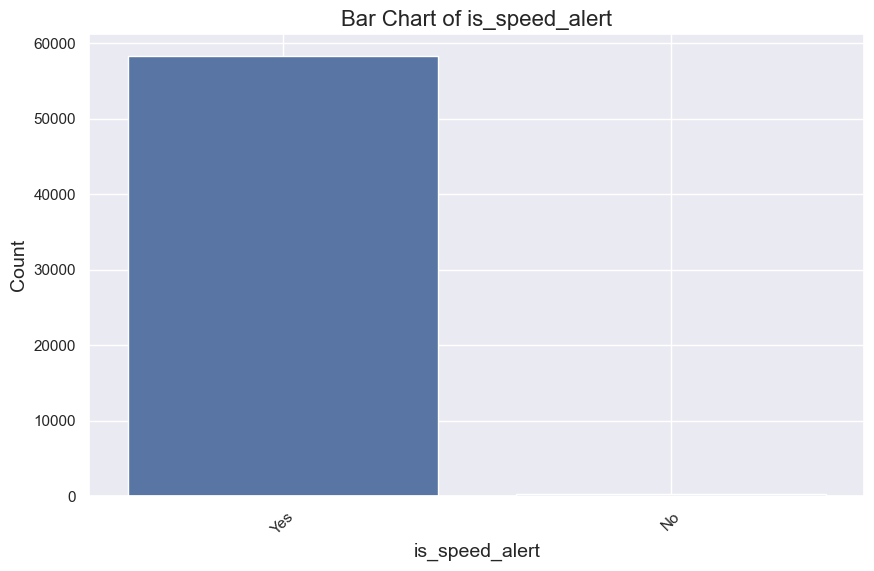

In [16]:
def create_bar_charts(data):
    # Select only the categorical columns from the DataFrame
    categorical_df = data.select_dtypes(include='object')

    # Create bar charts for each categorical column
    for column in categorical_df.columns:
        plt.figure(figsize=(10, 6))  # Adjust the size of the plot
        sns.countplot(data=data, x=column)  # Use seaborn's countplot function
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.title(f'Bar Chart of {column}', fontsize=16)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
        plt.grid(True)  # Add gridlines
        plt.show()

# Call the function with the training data
create_bar_charts(train_data)

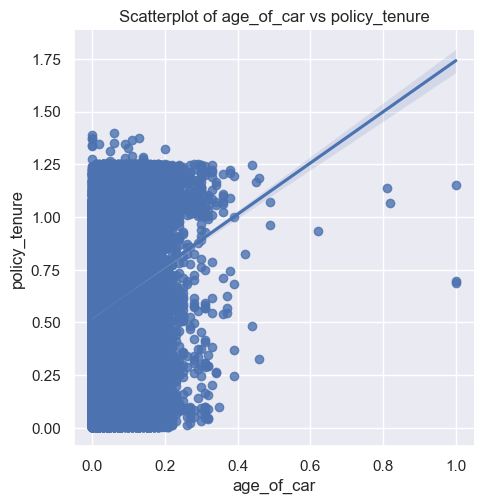

In [17]:
# Define a function to create scatterplots
def create_scatterplots(data, x, y):
    # Use seaborn's lmplot function to create a scatterplot
    # 'data' is the DataFrame to use, 'x' is the column for the x-axis, and 'y' is the column for the y-axis
    sns.lmplot(data=data, x=x, y=y)
    
    # Set the label for the x-axis
    plt.xlabel(x)
    
    # Set the label for the y-axis
    plt.ylabel(y)
    
    # Set the title for the plot
    plt.title(f"Scatterplot of {x} vs {y}")
    
    # Display the plot
    plt.show()

# Create a scatterplot of 'age_of_car' vs 'policy_tenure' using the 'train_data' DataFrame
create_scatterplots(train_data, 'age_of_car', 'policy_tenure')

In [18]:
# drop the 'id' column from the training data
train_data = train_data.drop(columns=['policy_id'])

In [19]:
# List columns with "yes" and "no" values
yes_no_columns = []
for column in train_data.columns:
    if set(train_data[column].unique()) == {'yes', 'no'}:
        yes_no_columns.append(column)

# Map "yes" to 1 and "no" to 0
for column in yes_no_columns:
    train_data[column] = train_data[column].map({'yes': 1, 'no': 0})

In [20]:
# Identify the categorical columns
categorical_columns = train_data.select_dtypes(include='object').columns
print(categorical_columns)

# One-hot encode the categorical columns
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print(train_data_encoded.head())

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
   policy_tenure  age_of_car  age_of_policyholder  population_density  make  \
0       0.515874        0.05             0.644231                4990     1   
1       0.672619        0.02             0.375000               27003     1   
2       0.841110        0.02             0.384615                4076     1   
3       0.900277        0.11             0.432692               21622     1   

In [21]:
# Create a new DataFrame 'X' by dropping the 'is_claim' column from the 'train_data_encoded' DataFrame
# 'X' will contain all the feature variables, which will be used to predict the target variable
X = train_data_encoded.drop('is_claim', axis=1)

# Create a new Series 'y' by selecting the 'is_claim' column from the 'train_data_encoded' DataFrame
# 'y' will be the target variable that the model will learn to predict
y = train_data_encoded['is_claim']

# Initialize the ADASYN object
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

# Apply ADASYN to your data
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Check target variable distribution
y_resampled.value_counts()

is_claim
1    55753
0    54844
Name: count, dtype: int64

In [22]:
# Model Building
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
rf = RandomForestClassifier()
lr = LogisticRegression(max_iter=1000)
gb = GradientBoostingClassifier()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the models to the training data
rf.fit(X_train, y_train)
lr.fit(X_train_scaled, y_train)  # Use the scaled data for Logistic Regression
gb.fit(X_train, y_train)

# Make predictions on the testing data
rf_preds = rf.predict(X_test)
lr_preds = lr.predict(X_test_scaled)  # Use the scaled data for Logistic Regression
gb_preds = gb.predict(X_test)

# Evaluate the performance of each model
rf_accuracy = accuracy_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

rf_precision = precision_score(y_test, rf_preds)
lr_precision = precision_score(y_test, lr_preds)
gb_precision = precision_score(y_test, gb_preds)

rf_recall = recall_score(y_test, rf_preds)
lr_recall = recall_score(y_test, lr_preds)
gb_recall = recall_score(y_test, gb_preds)

rf_f1 = f1_score(y_test, rf_preds)
lr_f1 = f1_score(y_test, lr_preds)
gb_f1 = f1_score(y_test, gb_preds)

# Compare the performance of each model
print("Model Performance:")
print("Random Forest:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")
print()
print("Logistic Regression:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-score: {lr_f1}")
print()
print("Gradient Boosting:")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1-score: {gb_f1}")

Model Performance:
Random Forest:
Accuracy: 0.909132007233273
Precision: 0.8985790408525755
Recall: 0.9209903513562716
F1-score: 0.9096466780544817

Logistic Regression:
Accuracy: 0.5900994575045208
Precision: 0.5832827011544137
Recall: 0.6116876024030584
F1-score: 0.5971475540942818

Gradient Boosting:
Accuracy: 0.8985533453887884
Precision: 0.940891668347791
Recall: 0.8490806480975788
F1-score: 0.8926315789473684


In [23]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on your data
xgb.fit(X_train, y_train)

# Predict the target variable for your validation data
y_pred = xgb.predict(X_val)

# Calculate and print the performance metrics
print("XGBoost:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))

XGBoost:
Accuracy: 0.9350813743218807
Precision: 0.9865498267780721
Recall: 0.8813034771527398
F1-score: 0.9309615384615385


In [24]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 400}
Best Score: 0.9392481537927421


In [24]:
# Initialize the XGBoost classifier with the best parameters
xgb_best = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                         learning_rate=0.2, max_depth=10, n_estimators=400)

# Fit the model to the data
xgb_best.fit(X_resampled, y_resampled)

# Predict the target variable for your validation data
y_pred = xgb_best.predict(X_val)

# Calculate and print the performance metrics
print("XGBoost with Best Parameters:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))

# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test)

# Calculate and print the performance metrics on the test set
print("\nPerformance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1-score:", f1_score(y_test, y_pred_test))

XGBoost with Best Parameters:
Accuracy: 0.9855786618444846
Precision: 0.9971106347283064
Recall: 0.973784817039869
F1-score: 0.9853096937600737

Performance on Test Set:
Accuracy: 0.9855786618444846
Precision: 0.9971106347283064
Recall: 0.973784817039869
F1-score: 0.9853096937600737


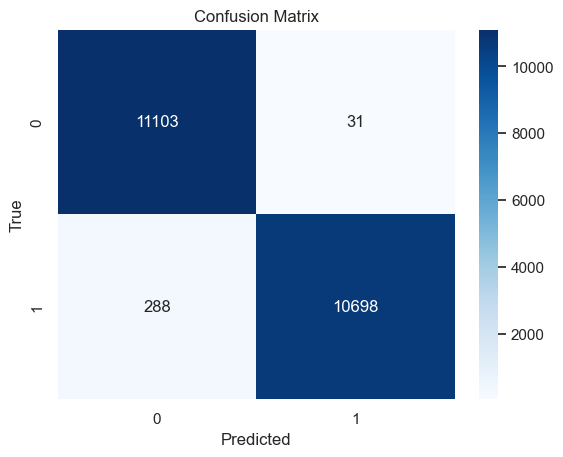

Confusion Matrix:
[[11103    31]
 [  288 10698]]


In [25]:
# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

This matrix can be interpreted as follows:

True Negatives (TN): 11103. The classifier correctly predicted that these many instances are negative (they don't have the condition).
False Positives (FP): 31. The classifier incorrectly predicted that these many instances are positive (they have the condition).
False Negatives (FN): 288. The classifier incorrectly predicted that these many instances are negative.
True Positives (TP): 10698. The classifier correctly predicted that these many instances are positive.

This means the model has a high accuracy as the number of true positives and true negatives is significantly higher than the number of false positives and false negatives. However, there are still some instances where the model predicted the wrong class.

In [28]:
# Perform 5-fold cross-validation on the XGBoost classifier using the resampled data
# This returns an array of accuracy scores, one for each fold of the cross-validation
scores = cross_val_score(xgb_best, X_resampled, y_resampled, cv=5)

# Calculate the mean and standard deviation of the accuracy scores
# Print the mean accuracy and the range within one standard deviation of the mean
# This gives an indication of the model's average performance and its stability across different subsets of the data
print("Cross-validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation Accuracy: 0.94 (+/- 0.11)


A cross-validation accuracy of 0.94 with a standard deviation of +/- 0.11 indicates that the model's performance is relatively stable across different subsets of the data. Here's what this means:

Mean Accuracy: The mean accuracy of 0.94 suggests that, on average, the model correctly predicts the target variable (whether a claim is made or not) approximately 94% of the time across different cross-validation folds.


Stability: The small standard deviation of 0.11 indicates that the model's performance does not vary significantly between different folds of the cross-validation process. This suggests that the model is not overly sensitive to the specific training/validation splits of the data.


Confidence Interval: The range of accuracy values within one standard deviation of the mean (0.94 +/- 0.11) provides a confidence interval for the model's performance. In this case, the model's accuracy is likely to fall within the range of approximately 81% to 100% across different subsets of the data.


Overall, a cross-validation accuracy of 0.94 with low variance indicates that the model is performing well and is likely to generalize effectively to unseen data. However, it's essential to consider other metrics such as precision, recall, and F1-score, especially in the context of imbalanced datasets, to ensure a comprehensive evaluation of the model's performance.

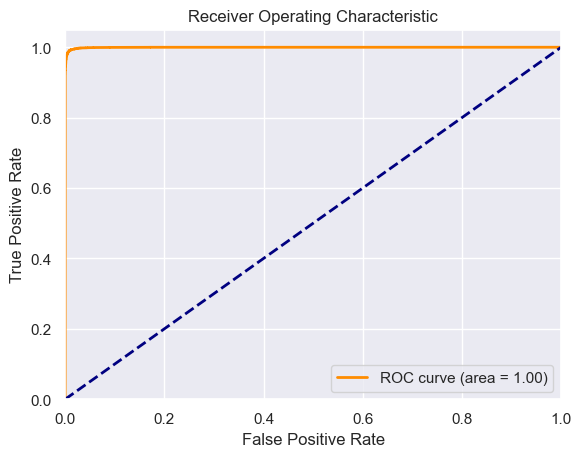

In [42]:
# Get the predicted probabilities of the positive class
y_pred_prob = xgb_best.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Here's a general interpretation of ROC-AUC scores:

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail

An ROC AUC score of 1.00 is exceptional:

I have achieved an ROC AUC score of 1.00. This means that I have a very high ability to distinguish between the positive and negative classes in my dataset. An AUC of 1.00 is perfect, indicating that my model has a 100% chance of correctly distinguishing between a randomly chosen positive instance and a randomly chosen negative instance. This suggests that my model's predictions are extremely reliable and accurate.

XGBoost with Best Parameters:
Accuracy: 0.9906419529837251
Precision: 0.9923266648396821
Recall: 0.988803932277444
F1-score: 0.9905621665982766


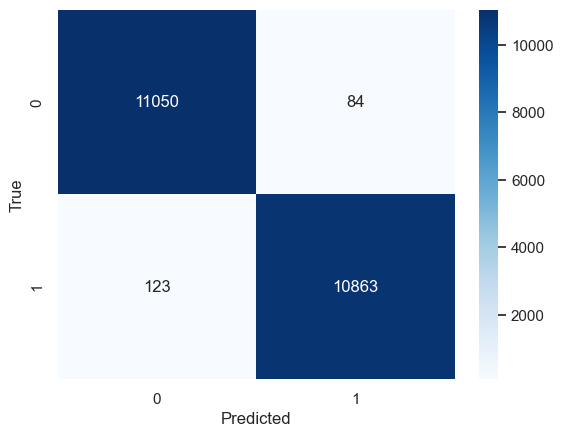

[[11050    84]
 [  123 10863]]


In [41]:
# Initialize the XGBoost classifier with the best parameters
xgb_best = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                         learning_rate=0.2, max_depth=10, n_estimators=400)

# Fit the model to the data
xgb_best.fit(X_resampled, y_resampled)

# Save the trained model to disk
joblib.dump(xgb_best, 'xgboost_model.pkl')

# Predict the target variable for your validation data
y_pred_prob = xgb_best.predict_proba(X_val)[:, 1]
y_pred_best = (y_pred_prob >= 0.37027785).astype(int)

# Calculate and print the performance metrics
print("XGBoost with Best Parameters:")
print("Accuracy:", accuracy_score(y_val, y_pred_best))
print("Precision:", precision_score(y_val, y_pred_best))
print("Recall:", recall_score(y_val, y_pred_best))
print("F1-score:", f1_score(y_val, y_pred_best))

# Make class predictions with optimal threshold
y_pred_prob_test = xgb_best.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob_test >= 0.37027785).astype(int)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print confusion matrix
print(cnf_matrix)

In [33]:
# # Drop irrelevant columns
# test_data = test_data.drop(columns=['policy_id'])

# Map "yes" to 1 and "no" to 0
for column in yes_no_columns:
    test_data[column] = test_data[column].map({'yes': 1, 'no': 0})

# One-hot encode categorical columns
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [40]:
# Load the model from the disk
xgb_best = joblib.load('xgboost_model.pkl')

# Make class predictions with optimal threshold
y_pred_prob_test = xgb_best.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob_test >= 0.37027785).astype(int)

In [35]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'predicted_label': y_pred})

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [38]:
# Calculate the accuracy of the model's predictions
# Accuracy is the proportion of true results (both true positives and true negatives) in the population
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision of the model's predictions
# Precision is the proportion of true positive results in the set of all samples identified as positive
precision = precision_score(y_test, y_pred)

# Calculate the recall (sensitivity) of the model's predictions
# Recall is the proportion of true positive results in the set of all actual positives
recall = recall_score(y_test, y_pred)

# Calculate the F1 score of the model's predictions
# F1 score is the harmonic mean of precision and recall, and it tries to find the balance between precision and recall
f1 = f1_score(y_test, y_pred)

# Calculate the ROC AUC score of the model's predictions
# ROC AUC score is the area under the receiver operating characteristic curve, which provides a measure of how well the model's predictions are ranked
roc_auc = roc_auc_score(y_test, y_pred)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9906419529837251
Precision: 0.9923266648396821
Recall: 0.988803932277444
F1 Score: 0.9905621665982766
ROC AUC Score: 0.9906297369308901
